# HSE 2021: Mathematical Methods for Data Analysis

## Homework 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.datasets import load_boston

%matplotlib inline

sns.set(style="whitegrid")

### Data

For this homework we use Boston Dataset from sklearn (based on UCI ML housing dataset).

In [2]:
data = load_boston() # load dataset

X = data.data
y = data.target
columns = data.feature_names

## Linear regression

#### 1. [0.5 points] Create Pandas DataFrame and split the data into train and test sets with ratio 80:20 with random_state=0.

In [3]:
boston_df = pd.DataFrame(data=data.data, columns=data.feature_names)
boston_df['MEDV'] = data.target # adding taget value to DF
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data Set Characteristics:**  

Number of Instances: 506 

Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

Attribute Information (in order):
- CRIM     per capita crime rate by town        
- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town        
- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX      nitric oxides concentration (parts per 10 million)
- RM       average number of rooms per dwelling
- AGE      proportion of owner-occupied units built prior to 1940
- DIS      weighted distances to five Boston employment centres
- RAD      index of accessibility to radial highways
- TAX      full-value property-tax rate per dlr 10,000 
- PTRATIO  pupil-teacher ratio by town        
- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT    % lower status of the population
- MEDV     Median value of owner-occupied homes in dlr 1000's

(got from data.DESCR)

In [4]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Total features - 13, MEDV - target value

All rows are not empty, no significant outliers

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(boston_df.drop(['MEDV'], axis=1),
                                                    boston_df['MEDV'],
                                                    train_size=0.8,
                                                    random_state=0)
cols = X_train.columns.insert(0, 'const')

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

def test_model(predict, X, y):
    y_pred = predict(X)
    r2 = r2_score(y, y_pred)
    r2_adj = 1 - (1 - r2) * (len(X) - 1) / (len(X) - len(X[0]) - 1)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    
    return r2, r2_adj, mse, rmse

#### 2. [1 point] Train models on train data using StatsModels library and apply it to the test set; use $RMSE$ and $R^2$ as the quality measure.

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.01$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.01$

Don't forget to scale the data before training the models with StandardScaler!

In [7]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [8]:
# Simple linear regression
model_lr = sm.OLS(y_train, X_train_scaled)
res_lr = model_lr.fit()

# with Lasso Regularization
model_lasso = sm.OLS(y_train, X_train_scaled)
res_lasso = model_lasso.fit_regularized(alpha=0.01, L1_wt=1)

# with Ridge Regularization
model_ridge = sm.OLS(y_train, X_train_scaled)
res_ridge = model_ridge.fit_regularized(alpha=0.01, L1_wt=0)

In [9]:
qual = []
qual.append(list(test_model(lambda X: res_lr.predict(X), X_test_scaled, y_test)))
qual.append(list(test_model(lambda X: res_lasso.predict(X), X_test_scaled, y_test)))
qual.append(list(test_model(lambda X: res_ridge.predict(X), X_test_scaled, y_test)))
qual.append(list(test_model(lambda X: res_lr.predict(X), X_train_scaled, y_train)))
qual.append(list(test_model(lambda X: res_lasso.predict(X), X_train_scaled, y_train)))
qual.append(list(test_model(lambda X: res_ridge.predict(X), X_train_scaled, y_train)))
quality = pd.DataFrame(qual,
                       columns=['r2', 'r2_adj', 'mse', 'rmse'],
                       index=['LR', 'Lasso', 'Ridge', 'LR-train', 'Lasso-train', 'Ridge-train'])
quality

,r2,r2_adj,mse,rmse
LR,0.589222,0.523120,33.448980,5.783509
Lasso,0.587416,0.521023,33.596095,5.796214
Ridge,0.583017,0.515917,33.954257,5.827028
LR-train,0.773014,0.764844,19.326470,4.396188
Lasso-train,0.772954,0.764783,19.331511,4.396761
Ridge-train,0.772217,0.764019,19.394302,4.403896


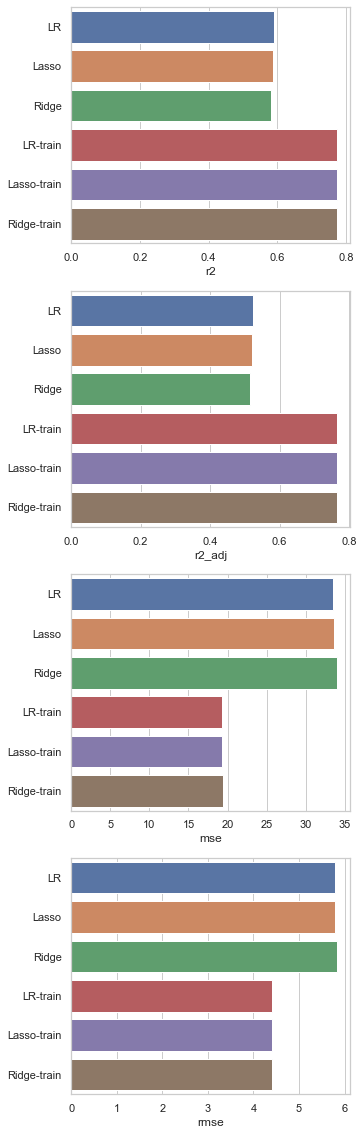

In [10]:
fig, axs = plt.subplots(ncols=1, nrows=4, figsize=(5, 20))
sns.barplot(y=quality.index, x=quality['r2'], ax=axs[0], label='R2')
sns.barplot(y=quality.index, x=quality['r2_adj'], ax=axs[1], label='R2 Adjusted')
sns.barplot(y=quality.index, x=quality['mse'], ax=axs[2], label='MSE')
sns.barplot(y=quality.index, x=quality['rmse'], ax=axs[3], label='RMSE')
plt.show()

#### 3. [1 point] Explore the values of the parameters of the resulting models and compare the number of zero weights in them. Comment on the significance of the coefficients, overal model significance and other related factors from the results table

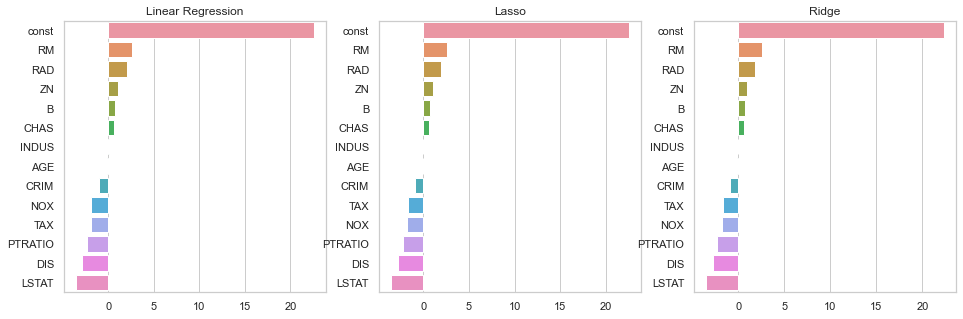

In [11]:
def plot_weights(weights, features, ax, label):
    sorted_weights = sorted(zip(weights, features), reverse=True)
    w = [x[0] for x in sorted_weights]
    f = [x[1] for x in sorted_weights]
    sns.barplot(x=w, y=f, ax=ax)
    ax.set_title(label)
    
    
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 5))    
plot_weights(res_lr.params, cols, axs[0], 'Linear Regression')
plot_weights(res_lasso.params, cols, axs[1], 'Lasso')
plot_weights(res_ridge.params, cols, axs[2], 'Ridge')

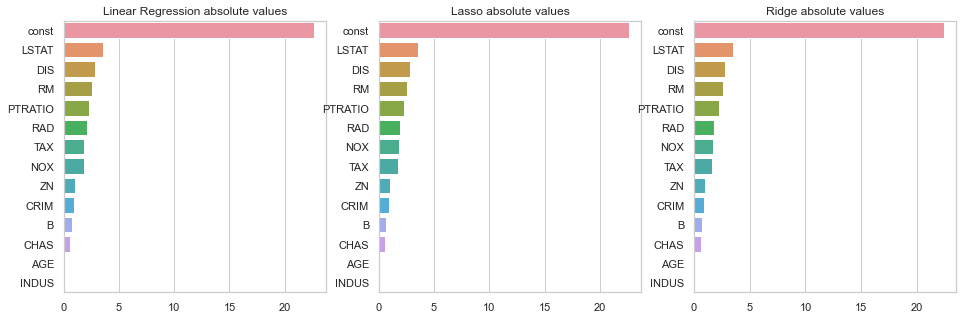

In [12]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(16, 5))    
plot_weights(np.abs(res_lr.params), cols, axs[0], 'Linear Regression absolute values')
plot_weights(np.abs(res_lasso.params), cols, axs[1], 'Lasso absolute values')
plot_weights(np.abs(res_ridge.params), cols, axs[2], 'Ridge absolute values')

**Conclusion:**

1. Constant (or bias) weight is the biggest in absolute value
2. Strong linear dependence
- RM (average number of rooms per dwelling), 
- RAD (index of accessibility to radial highways)
    
  It makes sense in real life: more rooms, more closely to radial highways -> bigger price of house
3. Strong inverse linear dependece.
- LSTAT (% lower status of the population), 
- DIS (weighted distances to five Boston employment centres), 
- PTRATIO (pupil-teacher ratio by town)

  Also makes sense in real life: more lower status people, farther from employment centers, less schools and teachers -> smaller price

#### 4. [1 point] Implement one of the elimination algorithms that were described in the Seminar_4 (Elimination by P-value, Forward elimination, Backward elimination), make conclusions.

In [13]:
# Linear Regression with Elimination by P-Value

for significance_level in [0.05, 0.01, 0.005, 0.001]:
    X_train_elim = X_train_scaled
    X_test_elim = X_test_scaled
    cls = X_train.columns.insert(0, 'const')
    print('\nSignificance level = {0:.3f}'.format(significance_level))
    
    while X_train_elim.shape[1] > 0:
        model_elim = sm.OLS(y_train, X_train_elim)
        res_lr_elim = model_elim.fit()
        max_pvalue = res_lr_elim.pvalues.max()
        if max_pvalue < significance_level: # if max pvalue is less than significance level - stop elimination
            break
        max_pvalue_id = res_lr_elim.pvalues.values.argmax() # index of max pvalue feature
        X_train_elim = np.delete(X_train_elim, obj=max_pvalue_id, axis=1)
        X_test_elim = np.delete(X_test_elim, obj=max_pvalue_id, axis=1)
        print('{0} feature was eliminated'.format(cls[max_pvalue_id]))
        cls = cls.delete(max_pvalue_id)
    
    r2, r2_adj, mse, rmse = test_model(lambda X: res_lr_elim.predict(X), X_test_elim, y_test)
    quality.loc['LR with Elimination by P-Value sl={0:.3f}'.format(significance_level)] = [r2, r2_adj, mse, rmse]

quality


Significance level = 0.050
INDUS feature was eliminated
AGE feature was eliminated

Significance level = 0.010
INDUS feature was eliminated
AGE feature was eliminated

Significance level = 0.005
INDUS feature was eliminated
AGE feature was eliminated
CHAS feature was eliminated

Significance level = 0.001
INDUS feature was eliminated
AGE feature was eliminated
CHAS feature was eliminated
B feature was eliminated
ZN feature was eliminated
TAX feature was eliminated
RAD feature was eliminated
CRIM feature was eliminated


,r2,r2_adj,mse,rmse
LR,0.589222,0.523120,33.448980,5.783509
Lasso,0.587416,0.521023,33.596095,5.796214
Ridge,0.583017,0.515917,33.954257,5.827028
LR-train,0.773014,0.764844,19.326470,4.396188
Lasso-train,0.772954,0.764783,19.331511,4.396761
Ridge-train,0.772217,0.764019,19.394302,4.403896
LR with Elimination by P-Value sl=0.050,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.010,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.005,0.579488,0.528092,34.241673,5.851639
LR with Elimination by P-Value sl=0.001,0.535251,0.505899,37.843770,6.151729


Elimination by P-value with significance level of 5%, 1%, 0.5%, 0.1% did not improve the model much in terms of R2 and RMSE quality metrics.

#### 5. [1 point] Find the best (in terms of RMSE) $\alpha$ for Ridge regression using cross-validation with 5 folds. You must select values from range $[10^{-4}, 10^{3}]$.

Best alpha = 6.1585


Text(0, 0.5, 'CV score')

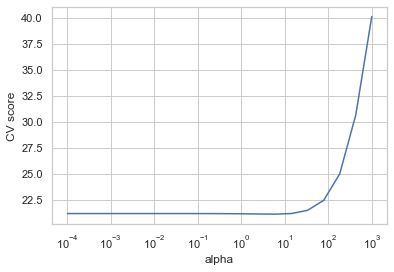

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alphas = np.logspace(-4, 3, 20)

searcher = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring='neg_mean_squared_error', cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_['alpha']
print('Best alpha = {0:.4f}'.format(best_alpha))

plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')

Let's look more precisely at $[10^{0}, 10^{2}]$ interval

Best alpha = 5.9636


Text(0, 0.5, 'CV score')

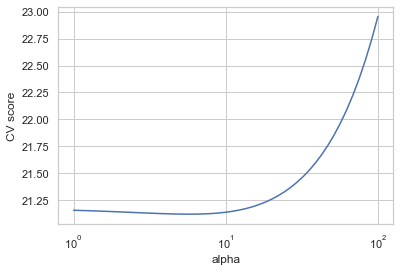

In [15]:
alphas = np.logspace(0, 2, 50)

searcher = GridSearchCV(Ridge(), [{'alpha': alphas}], scoring='neg_mean_squared_error', cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_['alpha']
print('Best alpha = {0:.4f}'.format(best_alpha))

plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')

In [16]:
model_best_alpha = Ridge(alpha=best_alpha)
model_best_alpha.fit(X_train_scaled, y_train)
r2, r2_adj, mse, rmse = test_model(lambda X: model_best_alpha.predict(X), X_test_scaled, y_test)
quality.loc['Ridge with best alpha={0:.3f}'.format(best_alpha)] = [r2, r2_adj, mse, rmse]
quality

,r2,r2_adj,mse,rmse
LR,0.589222,0.523120,33.448980,5.783509
Lasso,0.587416,0.521023,33.596095,5.796214
Ridge,0.583017,0.515917,33.954257,5.827028
LR-train,0.773014,0.764844,19.326470,4.396188
Lasso-train,0.772954,0.764783,19.331511,4.396761
Ridge-train,0.772217,0.764019,19.394302,4.403896
LR with Elimination by P-Value sl=0.050,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.010,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.005,0.579488,0.528092,34.241673,5.851639
LR with Elimination by P-Value sl=0.001,0.535251,0.505899,37.843770,6.151729


Gridsearch helped to find best $\alpha$ for Ridge regression. However, it did not imrove model much in terms of R2 and RMSE scores on test dataset. 

## Gradient descent

#### 6. [3.5 points] Implement a linear regression model for the MSE loss function, trained by gradient descent.

All calculations must be vectorized, and python loops can only be used for gradient descent iterations. As a stop criterion, you must use (simultaneously):

* checking for the Euclidean norm of the weight difference on two adjacent iterations (for example, less than some small number of the order of $10^{-6}$, set by the `tolerance` parameter);
* reaching the maximum number of iterations (for example, 10000, set by the `max_iter` parameter).

You need to implement:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is the estimate of the gradient over the butch of objects selected randomly.

* Momentum method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$


To make sure that the optimization process really converges, we will use the `loss_history` class attribute. After calling the `fit` method, it should contain the values of the loss function for all iterations, starting from the first one (before the first step on the anti-gradient).

You need to initialize the weights with a zero or random (from a normal distribution) vector. The following is a template class that needs to contain the code implementing all variations of the models.

In [17]:
from sklearn.base import BaseEstimator
from random import sample

# did not understand whether momentum shoud go with GD or SGD
# so added gd_type 'MomentumSGD'
# if it was meant sample, not batch in SGD - setting batch_size=1 solves problem

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum', 
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: 'GradientDescent', 'StochasticDescent', 'Momentum', 'MomentumSGD'
        tolerance: for stopping gradient descent
        max_iter: maximum number of steps in gradient descent
        w0: np.array of shape (d) - init weights
        eta: learning rate
        alpha: momentum coefficient
        """
        self.delta = delta # if delta was planned to be bias coefficient - it has to be in input X
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = None # list of loss function values at each training iteration
        self.batch_size = 20
    
    def fit(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: self
        """
        
        self.loss_history = []
        if self.w0 == None:
            self.w0 = np.random.randn(X.shape[1]) * 0.0001 
        self.w = self.w0
        dW = 0
        
        for _ in range(self.max_iter):
            if self.gd_type == 'Momentum' or self.gd_type == 'MomentumSGD':
                dW = - self.eta * self.calc_gradient(X, y) + self.alpha * dW
            else:
                dW = - self.eta * self.calc_gradient(X, y)
                
            self.w += dW

            if self.euclidian_norm(dW) < self.tolerance:
                return self
                
            self.loss_history.append(self.calc_loss(X, y))

        return self
    
    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        
        return np.dot(X, self.w)
    
    def calc_gradient(self, X, y):
        """
        X: np.array of shape (l, d) (l can be equal to 1 if stochastic)
        y: np.array of shape (l)
        ---
        output: np.array of shape (d)
        """
        
        if (self.gd_type == 'GradientDescent' or self.gd_type == 'Momentum'):
            y_pred = self.predict(X)
            error = y - y_pred
            grad = np.dot(-X.T, error) / X.shape[0]
            return grad
        elif (self.gd_type == 'StochasticDescent' or self.gd_type == 'MomentumSGD'):
            idx = sample(range(y.shape[0]), self.batch_size)
            X_batch = [X[i] for i in idx]
            X_batch = np.array(X_batch)
            y_batch = [y.iloc[i] for i in idx]
            y_pred = self.predict(X_batch)
            error = y_batch - y_pred
            grad = np.dot(-X_batch.T, error) / X_batch.shape[0]
            return grad
        else: 
            return None

    def calc_loss(self, X, y):
        """
        X: np.array of shape (l, d)
        y: np.array of shape (l)
        ---
        output: float 
        """ 
        y_pred = np.dot(X, self.w)
        loss = mean_squared_error(y, y_pred)
        
        return loss
    
    def euclidian_norm(self, a):
        return np.sqrt(np.dot(a.T, a))

#### 7. [1 points] Train and validate "hand-written" models on the same data, and compare the quality with the Sklearn or StatsModels methods. Investigate the effect of the `max_iter` and `alpha` parameters on the optimization process. Is it consistent with your expectations?

In [18]:
# just in case 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [19]:
model_mom = LinReg(gd_type='Momentum')
model_mom.fit(X_train_scaled, y_train)

model_grad = LinReg(gd_type='GradientDescent')
model_grad.fit(X_train_scaled, y_train)

model_sgd = LinReg(gd_type='StochasticDescent')
model_sgd.fit(X_train_scaled, y_train)

model_mom_sgd = LinReg(gd_type='MomentumSGD')
model_mom_sgd.fit(X_train_scaled, y_train)

LinReg(gd_type='MomentumSGD',
       w0=array([22.52073497, -0.85469125,  0.77495283, -0.20712647,  0.75275156,
       -1.37829614,  2.67715772, -0.05624859, -2.57882275,  1.17475611,
       -0.76841204, -2.1773697 ,  0.68439958, -3.75175534]))

Best alpha = 0.6632


Text(0, 0.5, 'CV score')

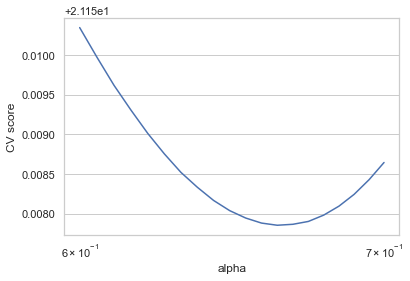

In [20]:
alphas = np.linspace(0.6, 0.7, 20)

searcher = GridSearchCV(LinReg(gd_type='Momentum'), [{'alpha': alphas}], scoring='neg_mean_squared_error', cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_['alpha']
print('Best alpha = {0:.4f}'.format(best_alpha))

plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')

Best alpha = 0.0635


Text(0, 0.5, 'CV score')

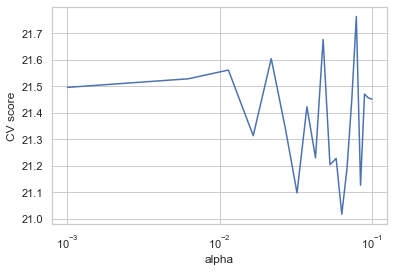

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

alphas = np.linspace(0.001, 0.1, 20)

searcher = GridSearchCV(LinReg(gd_type='MomentumSGD'), [{'alpha': alphas}], scoring='neg_mean_squared_error', cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha_sgd = searcher.best_params_['alpha']
print('Best alpha = {0:.4f}'.format(best_alpha_sgd))

plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')

Best alpha = 0.0659


Text(0, 0.5, 'CV score')

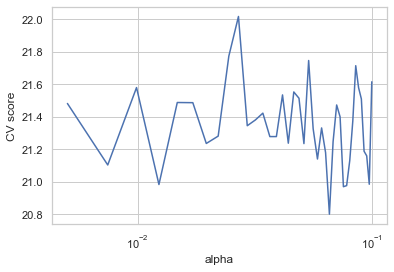

In [22]:
alphas = np.linspace(0.005, 0.1, 40)

searcher = GridSearchCV(LinReg(gd_type='MomentumSGD'), [{'alpha': alphas}], scoring='neg_mean_squared_error', cv=5)
searcher.fit(X_train_scaled, y_train)

best_alpha_sgd = searcher.best_params_['alpha']
print('Best alpha = {0:.4f}'.format(best_alpha_sgd))

plt.plot(alphas, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('CV score')

Best max_iter = 1000.0000


Text(0, 0.5, 'CV score')

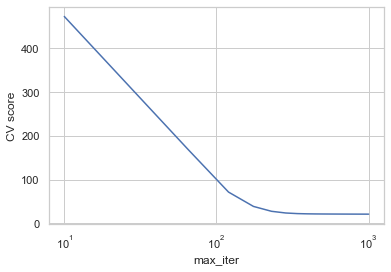

In [24]:
max_iters = np.linspace(10, 1000, 19)
max_iters = list(map(lambda x: int(x), max_iters))

searcher = GridSearchCV(LinReg(gd_type='Momentum'), [{'max_iter': max_iters}], scoring='neg_mean_squared_error', cv=5)
searcher.fit(X_train_scaled, y_train)

best_max_iter = searcher.best_params_['max_iter']
print('Best max_iter = {0:.4f}'.format(best_max_iter))

plt.plot(max_iters, -searcher.cv_results_['mean_test_score'])
plt.xscale('log')
plt.xlabel('max_iter')
plt.ylabel('CV score')

1. Gridsearch on full gradient best momentum value: best $\alpha$=**0.6632**. I explored intervals $[10^{-3}, 10^{0}]$ and $[0.6, 0.7]$. Best alpha is 0.6632
2. Gridsearch on SGD best momentum value: no visible dependence, I tried $[0.01, 0.5, 40]$, $[0.001, 0.1, 20]$, $[0.005, 0.05, 40]$, $[0.005, 0.1, 40]$ linspaces, seems like **0.0269** is one of the best values
3. Gridsearch on best max_iter value. More iteration -> better result, which makes sense. 

In [25]:
model_mom = LinReg(gd_type='Momentum', alpha=0.6632)
model_mom.fit(X_train_scaled, y_train)

model_grad = LinReg(gd_type='GradientDescent')
model_grad.fit(X_train_scaled, y_train)

model_sgd = LinReg(gd_type='StochasticDescent')
model_sgd.fit(X_train_scaled, y_train)

model_mom_sgd = LinReg(gd_type='MomentumSGD', alpha=0.0269)
model_mom_sgd.fit(X_train_scaled, y_train)

r2, r2_adj, mse, rmse = test_model(lambda X: model_mom.predict(X), X_test_scaled, y_test)
quality.loc['Custom FGD+Mom'] = [r2, r2_adj, mse, rmse]
r2, r2_adj, mse, rmse = test_model(lambda X: model_grad.predict(X), X_test_scaled, y_test)
quality.loc['Custom FGD'] = [r2, r2_adj, mse, rmse]
r2, r2_adj, mse, rmse = test_model(lambda X: model_sgd.predict(X), X_test_scaled, y_test)
quality.loc['Custom SGD'] = [r2, r2_adj, mse, rmse]
r2, r2_adj, mse, rmse = test_model(lambda X: model_mom_sgd.predict(X), X_test_scaled, y_test)
quality.loc['Custom SGD+Mom'] = [r2, r2_adj, mse, rmse]

In [26]:
quality

,r2,r2_adj,mse,rmse
LR,0.589222,0.523120,33.448980,5.783509
Lasso,0.587416,0.521023,33.596095,5.796214
Ridge,0.583017,0.515917,33.954257,5.827028
LR-train,0.773014,0.764844,19.326470,4.396188
Lasso-train,0.772954,0.764783,19.331511,4.396761
Ridge-train,0.772217,0.764019,19.394302,4.403896
LR with Elimination by P-Value sl=0.050,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.010,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.005,0.579488,0.528092,34.241673,5.851639
LR with Elimination by P-Value sl=0.001,0.535251,0.505899,37.843770,6.151729


It's working!!!

And r2 score is quite close to statsmodels library options

Let's add sklearn regression models

In [27]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

sk_model_lr = LinearRegression()
sk_model_lr.fit(X_train_scaled, y_train)

sk_model_lasso = Lasso(alpha=0.01)
sk_model_lasso.fit(X_train_scaled, y_train)

sk_model_ridge = Ridge(alpha=0.01)
sk_model_ridge.fit(X_train_scaled, y_train)

r2, r2_adj, mse, rmse = test_model(lambda X: sk_model_lr.predict(X), X_test_scaled, y_test)
quality.loc['LR-sklearn'] = [r2, r2_adj, mse, rmse]
r2, r2_adj, mse, rmse = test_model(lambda X: sk_model_lasso.predict(X), X_test_scaled, y_test)
quality.loc['Lasso-sklearn'] = [r2, r2_adj, mse, rmse]
r2, r2_adj, mse, rmse = test_model(lambda X: sk_model_ridge.predict(X), X_test_scaled, y_test)
quality.loc['Ridge-sklearn'] = [r2, r2_adj, mse, rmse]

In [28]:
quality

,r2,r2_adj,mse,rmse
LR,0.589222,0.523120,33.448980,5.783509
Lasso,0.587416,0.521023,33.596095,5.796214
Ridge,0.583017,0.515917,33.954257,5.827028
LR-train,0.773014,0.764844,19.326470,4.396188
Lasso-train,0.772954,0.764783,19.331511,4.396761
Ridge-train,0.772217,0.764019,19.394302,4.403896
LR with Elimination by P-Value sl=0.050,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.010,0.589527,0.534182,33.424197,5.781366
LR with Elimination by P-Value sl=0.005,0.579488,0.528092,34.241673,5.851639
LR with Elimination by P-Value sl=0.001,0.535251,0.505899,37.843770,6.151729


It's time for graphs

In [29]:
quality = quality.drop(['LR-train', 'Lasso-train', 'Ridge-train'])

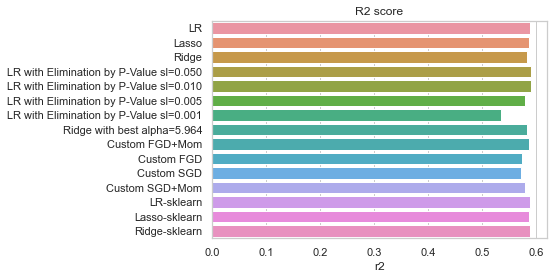

In [30]:
label = quality.index
r2 = quality['r2']
sns.barplot(y=label, x=r2)
plt.title('R2 score')

plt.show()

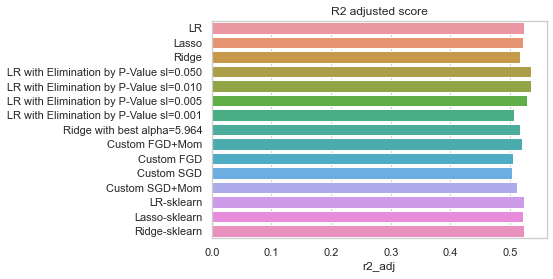

In [31]:
r2_adj = quality['r2_adj']
sns.barplot(y=label, x=r2_adj)
plt.title('R2 adjusted score')

plt.show()

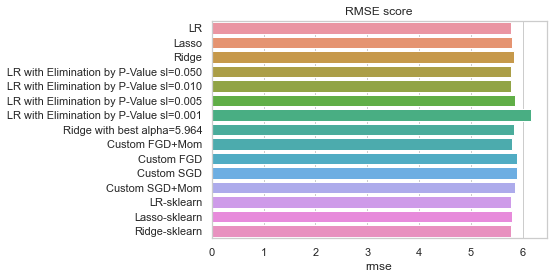

In [32]:
rmse = quality['rmse']
sns.barplot(y=label, x=rmse)
plt.title('RMSE score')

plt.show()

Custom gradient descent linear regression is working and gives close to libraries options R2 and RMSE quality metrics.

#### 8. [1 points] Plot graphs (on the same picture) of the dependence of the loss function value on the iteration number for Full GD, SGD and Momentum. Draw conclusions about the rate of convergence of various modifications of gradient descent.

Don't forget about what *beautiful* graphics should look like!

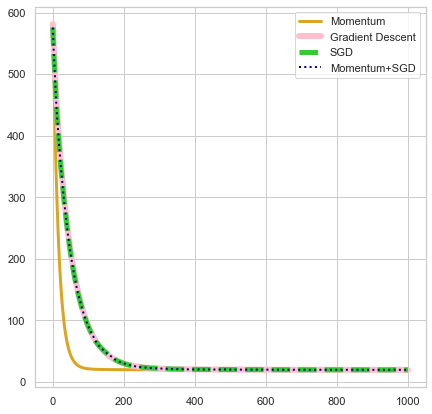

In [33]:
plt.figure(figsize=(7, 7))
sns.lineplot(data=model_mom.loss_history, label='Momentum' , linewidth=3, color='goldenrod')
sns.lineplot(data=model_grad.loss_history, label='Gradient Descent', linewidth=6, color='pink')
sns.lineplot(data=model_sgd.loss_history, label='SGD', linewidth=5, color='limegreen', linestyle='--')
sns.lineplot(data=model_sgd.loss_history, label='Momentum+SGD', linewidth=2, color='navy', linestyle=':')

plt.show()

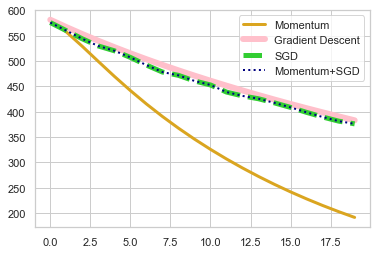

In [34]:
# to be sure that last 3 methods actually different

sns.lineplot(data=model_mom.loss_history[:20], label='Momentum' , linewidth=3, color='goldenrod')
sns.lineplot(data=model_grad.loss_history[:20], label='Gradient Descent', linewidth=6, color='pink')
sns.lineplot(data=model_sgd.loss_history[:20], label='SGD', linewidth=5, color='limegreen', linestyle='--')
sns.lineplot(data=model_sgd.loss_history[:20], label='Momentum+SGD', linewidth=2, color='navy', linestyle=':')

plt.show()

They are different, I swear

**Conclusion**

With best momentum (by Gridsearch) for Momentum and MomentumSGD types of gradient descent loss function for methods Full GD, SGD and Momentum + SGD decreases almost the same way, for Momentum + Full GD it decreases faster.
SGD and Momentum + SGD are so close probably because of low momentum value